In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
# pd.set_option('display.max_columns', None) # 전체 열 보기
# pd.set_option('display.max_rows', None) # 전체 행 보기

In [3]:
ROOT_DIR = "data"

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [4]:
for i in train_data.columns:
    print(i)

Wip Line_Dam
Process Desc._Dam
Equipment_Dam
Model.Suffix_Dam
Workorder_Dam
Insp. Seq No._Dam
Insp Judge Code_Dam
CURE END POSITION X Collect Result_Dam
CURE END POSITION X Unit Time_Dam
CURE END POSITION X Judge Value_Dam
CURE END POSITION Z Collect Result_Dam
CURE END POSITION Z Unit Time_Dam
CURE END POSITION Z Judge Value_Dam
CURE END POSITION ? Collect Result_Dam
CURE END POSITION ? Unit Time_Dam
CURE END POSITION ? Judge Value_Dam
CURE SPEED Collect Result_Dam
CURE SPEED Unit Time_Dam
CURE SPEED Judge Value_Dam
CURE STANDBY POSITION X Collect Result_Dam
CURE STANDBY POSITION X Unit Time_Dam
CURE STANDBY POSITION X Judge Value_Dam
CURE STANDBY POSITION Z Collect Result_Dam
CURE STANDBY POSITION Z Unit Time_Dam
CURE STANDBY POSITION Z Judge Value_Dam
CURE STANDBY POSITION ? Collect Result_Dam
CURE STANDBY POSITION ? Unit Time_Dam
CURE STANDBY POSITION ? Judge Value_Dam
CURE START POSITION X Collect Result_Dam
CURE START POSITION X Unit Time_Dam
CURE START POSITION X Judge Value_Dam

In [5]:
def restore_column_order(df, start_row, start_col):
    df_corrected = df.copy()

    # 특정 행 이후의 데이터에 대해 shift 함수 적용
    for i in range(start_col,len(df.columns)-3):
        df_corrected.iloc[start_row:,i] = df.iloc[start_row:,i+3]
    return df_corrected

In [6]:
# NULL 값 존재하는 열 제거
for column in train_data.columns:
    if train_data[column].nunique() == 0:
        train_data.drop(column, axis=1, inplace=True)

In [7]:
print(len(train_data.columns))

186


In [8]:
train_data.isnull().sum()

Wip Line_Dam                           0
Process Desc._Dam                      0
Equipment_Dam                          0
Model.Suffix_Dam                       0
Workorder_Dam                          0
                                      ..
PalletID Collect Result_Fill2          0
Production Qty Collect Result_Fill2    0
Receip No Collect Result_Fill2         0
WorkMode Collect Result_Fill2          0
target                                 0
Length: 186, dtype: int64

In [9]:
#값이 1개인 열 제거
for column in train_data.columns:
    if (train_data[column].nunique() == 1) and (train_data[column].isnull().sum() == 0):
        print(column)
        train_data.drop(column, axis=1, inplace=True)

Wip Line_Dam
Process Desc._Dam
Insp. Seq No._Dam
Insp Judge Code_Dam
CURE STANDBY POSITION X Collect Result_Dam
CURE STANDBY POSITION Z Collect Result_Dam
CURE STANDBY POSITION ? Collect Result_Dam
CURE START POSITION Z Collect Result_Dam
Wip Line_AutoClave
Process Desc._AutoClave
Equipment_AutoClave
Insp. Seq No._AutoClave
Insp Judge Code_AutoClave
1st Pressure Judge Value_AutoClave
2nd Pressure Judge Value_AutoClave
3rd Pressure Judge Value_AutoClave
Wip Line_Fill1
Process Desc._Fill1
Insp. Seq No._Fill1
Insp Judge Code_Fill1
Wip Line_Fill2
Process Desc._Fill2
Insp. Seq No._Fill2
Insp Judge Code_Fill2
CURE END POSITION ? Collect Result_Fill2
CURE STANDBY POSITION X Collect Result_Fill2
CURE STANDBY POSITION ? Collect Result_Fill2
CURE START POSITION ? Collect Result_Fill2
DISCHARGED SPEED OF RESIN Collect Result_Fill2
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2
Dispen

In [10]:
len(train_data.columns)

151

In [11]:
for i in train_data.columns:
    print(i, " : " , train_data[i].nunique())

Equipment_Dam  :  2
Model.Suffix_Dam  :  7
Workorder_Dam  :  663
CURE END POSITION X Collect Result_Dam  :  2
CURE END POSITION Z Collect Result_Dam  :  2
CURE END POSITION ? Collect Result_Dam  :  2
CURE SPEED Collect Result_Dam  :  5
CURE START POSITION X Collect Result_Dam  :  2
CURE START POSITION ? Collect Result_Dam  :  2
DISCHARGED SPEED OF RESIN Collect Result_Dam  :  3
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  :  19
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  :  29
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  :  20
Dispense Volume(Stage1) Collect Result_Dam  :  23
Dispense Volume(Stage2) Collect Result_Dam  :  33
Dispense Volume(Stage3) Collect Result_Dam  :  22
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  :  7
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam  :  1
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam  :  41
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  :  40
HEAD NORMAL COORDINATE Y AXIS(Stage1) Col

In [12]:
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave', 
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'
]

# 열 삭제
data = train_data.drop(columns=columns_to_drop, inplace = True)

# 열 이름 변경
data = train_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

In [13]:
data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].replace('OK', pd.np.nan)
data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].replace('OK', pd.np.nan)
data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].replace('OK', pd.np.nan)

data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].astype('float')
data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].astype('float')
data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].astype('float')

C:\Users\kushn\AppData\Local\Temp\ipykernel_15320\705984792.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].replace('OK', pd.np.nan)
C:\Users\kushn\AppData\Local\Temp\ipykernel_15320\705984792.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'] = data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].replace('OK', pd.np.nan)
C:\Users\kushn\AppData\Local\Temp\ipykernel_15320\705984792.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = data['H

In [14]:
for i in data.select_dtypes(include = 'object').columns:
    print(i, " : " , data[i].nunique())

Equipment_Dam  :  2
Model.Suffix  :  7
Workorder  :  663
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam  :  1
Chamber Temp. Judge Value_AutoClave  :  2
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave  :  1
Equipment_Fill1  :  2
Equipment_Fill2  :  2
target  :  2


In [15]:
from sklearn.preprocessing import LabelEncoder
qual_col = ['Equipment_Dam','Equipment_Fill1', 'Equipment_Fill2', 'Chamber Temp. Judge Value_AutoClave']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(data[i])
    data[i] = le.transform(data[i])


In [16]:
data['Equipment_Fill2']

0        0
1        0
2        1
3        1
4        0
        ..
40501    0
40502    1
40503    0
40504    1
40505    0
Name: Equipment_Fill2, Length: 40506, dtype: int32

In [17]:
data.dtypes[data.dtypes=='object']

Model.Suffix                                             object
Workorder                                                object
HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam    object
GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave     object
target                                                   object
dtype: object

In [18]:
#data.info(verbose = True, null_counts = True)

In [19]:
# for label in np.unique(test_x[i]): 
#        if label not in le.classes_: 
#            le.classes_ = np.append(le.classes_, label)
#    test_x[i] = le.transform(test_x[i]) 

In [20]:
#for i in data.select_dtypes(include = 'object'):
    #print(data.select_dtypes(include = 'object')[i].value_counts())

In [21]:
data.select_dtypes(exclude = 'object').isnull().sum()

Equipment_Dam                             0
CURE END POSITION X Collect Result_Dam    0
CURE END POSITION Z Collect Result_Dam    0
CURE END POSITION ? Collect Result_Dam    0
CURE SPEED Collect Result_Dam             0
                                         ..
Machine Tact time Collect Result_Fill2    0
PalletID Collect Result_Fill2             0
Production Qty Collect Result_Fill2       0
Receip No Collect Result_Fill2            0
WorkMode Collect Result_Fill2             0
Length: 137, dtype: int64

In [22]:
num_data = data.select_dtypes(exclude = 'object').dropna(axis = 1)

In [23]:
#num_data['target'] = data.target
#num_data.to_csv('preprocess_data.csv', index=False)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(num_data, data.target, test_size=0.2, shuffle=True, stratify=data['target'], random_state=34)

In [25]:
y_train.value_counts()

Normal      30524
AbNormal     1880
Name: target, dtype: int64

In [26]:
y_test.value_counts()

Normal      7632
AbNormal     470
Name: target, dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [28]:
# PCA 변환
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_scaled.shape)
print(X_train_pca.shape)

(32404, 134)
(32404, 17)


In [29]:
df_pca = pd.DataFrame(data=X_train_pca)
df_pca['target'] = data['target']
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,target
0,-5.645681,-4.749955,2.507638,-3.256958,-0.789341,0.038829,-0.415998,-1.057849,-0.557178,-1.007262,-0.324268,-0.821443,1.020937,1.210640,0.287349,-0.273507,0.646704,Normal
1,7.615796,2.277552,5.716804,0.653114,0.621840,-0.102250,-0.855015,0.274478,0.297435,0.673161,1.339527,-1.489473,-0.597633,1.279051,-0.785088,1.920222,-1.752213,Normal
2,11.027171,-2.105658,-1.530748,-0.134729,-0.903904,-1.283907,-0.855296,1.510882,0.195472,-1.369292,-0.353621,0.497664,0.400888,-0.623996,0.268751,0.296441,-0.403081,Normal
3,11.154954,-1.710654,-1.427986,0.497907,-0.924594,-1.564929,-0.559813,1.737364,0.304648,0.394418,-0.192150,0.411766,1.088719,0.342421,0.104842,1.299154,1.575662,Normal
4,-4.074352,-5.081932,1.276877,1.076570,-0.437607,1.094544,1.589952,-0.232977,-0.715947,2.264131,-0.323724,0.005724,1.427424,-0.965566,0.833545,0.460448,-0.559016,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399,-4.365935,-5.607407,0.676329,-0.849377,2.540400,-0.247015,0.450171,0.453955,0.087962,-0.735878,-0.844892,0.322498,1.119621,0.773620,1.048115,-0.327738,-1.423528,Normal
32400,-5.126306,-5.966949,0.748460,-0.368191,1.737173,-2.304396,1.058795,-0.206353,0.115760,-1.832100,-0.248584,0.485914,-1.267457,-0.672587,-0.973297,-1.074628,-0.148351,Normal
32401,-8.406444,2.489196,-3.230645,-2.727867,-1.176832,0.400002,-1.148532,-0.328479,-0.290620,-1.439084,0.652684,-0.802065,-1.045288,0.336447,-0.943854,-0.235886,-0.269597,Normal
32402,-6.948618,1.715532,-5.143537,0.812476,1.142613,-1.403428,-0.090304,0.083266,0.262147,-1.195835,0.381114,-0.328395,-0.795047,0.205177,-0.620813,-0.700556,1.240356,Normal


In [30]:
pca.explained_variance_ratio_

array([0.4916175 , 0.15116426, 0.10462218, 0.02857593, 0.02416532,
       0.022918  , 0.0167038 , 0.01641402, 0.01523404, 0.01325257,
       0.01268714, 0.01197358, 0.01102946, 0.00941279, 0.00896989,
       0.00815388, 0.00704089])

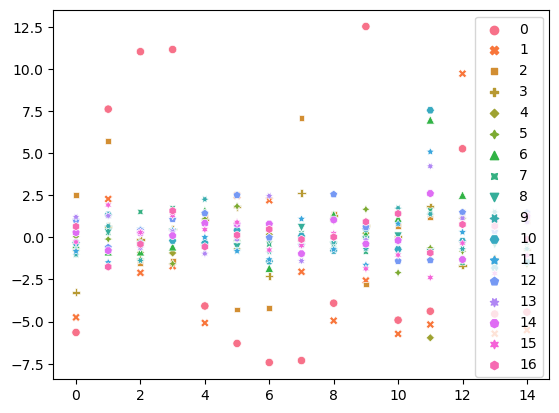

In [31]:
# 시각화
sns.scatterplot(data=df_pca[:15])
plt.show()

In [32]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

y_train_hat = clf.predict(X_train_scaled)
print('train accuracy:', accuracy_score(y_train, y_train_hat))

y_test_hat = clf.predict(X_test_scaled)
print('test accuracy:', accuracy_score(y_test, y_test_hat))

train accuracy: 0.950777681767683
test accuracy: 0.9387805480128364


In [33]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train_pca, y_train)

y_train_hat = clf2.predict(X_train_pca)
print('train accuracy:', accuracy_score(y_train, y_train_hat))

y_test_hat = clf2.predict(X_test_pca)
print('test accuracy:', accuracy_score(y_test, y_test_hat))

train accuracy: 0.9513331687445994
test accuracy: 0.9368057269809923


In [34]:
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
scores = cross_val_score(dt_clf , num_data , data.target , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8896 0.885  0.8915]
평균 검증 정확도: 0.8887


In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_train_pca)

KMeans(n_clusters=5)

In [36]:
kmeans.labels_

array([0, 4, 2, ..., 3, 3, 2])

In [37]:
print(kmeans.cluster_centers_)

[[-5.30761353e+00 -4.60405844e+00  2.51438225e+00 -2.35195762e-01
   2.50951330e-01 -2.09455971e-01  6.68587909e-01 -3.54895899e-01
  -7.89772701e-02 -1.29709400e-03 -1.97676291e-01  1.64530043e-01
   2.13595847e-01 -1.10665995e-01  6.53119234e-02 -4.93270452e-02
  -2.39646545e-02]
 [ 5.57710844e+00  9.66220698e+00  1.33847160e+00 -1.49623562e+00
   8.63585966e-01 -7.47061981e-01  2.29696499e+00 -1.03975484e+00
  -3.64515199e-01 -1.14841035e-01 -8.14046808e-01  8.13606685e-01
   6.24302111e-01 -3.78679329e-01 -3.62461294e-02 -1.70781827e-01
  -5.83507160e-02]
 [ 1.16597303e+01 -2.27882384e+00 -2.10350086e+00  4.23226794e-01
  -4.57902343e-01  2.75019670e-01 -4.94940763e-01  3.03682429e-01
   1.04611699e-01 -4.46808498e-02 -9.88764055e-02  1.81279678e-01
   9.64299843e-02 -1.69076946e-01 -9.42981736e-02 -1.21988642e-01
  -4.97911795e-02]
 [-7.63159779e+00  2.89943401e+00 -3.14053452e+00  4.06390339e-01
  -2.62032282e-01  2.38650758e-01 -6.46620870e-01  2.85909796e-01
   9.28643237e-02  

In [38]:
assignments_X_train = kmeans.labels_
print(assignments_X_train)

[0 4 2 ... 3 3 2]


In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=42)
df_cluster_tsne = tsne.fit_transform(x_train)

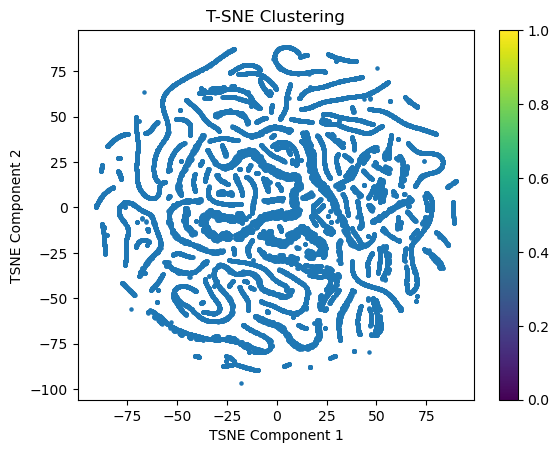

In [40]:
# 2D 시각화
plt.scatter(df_cluster_tsne[:, 0], df_cluster_tsne[:, 1], s=5, cmap='viridis')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title(f'T-SNE Clustering')
plt.colorbar()
plt.show()

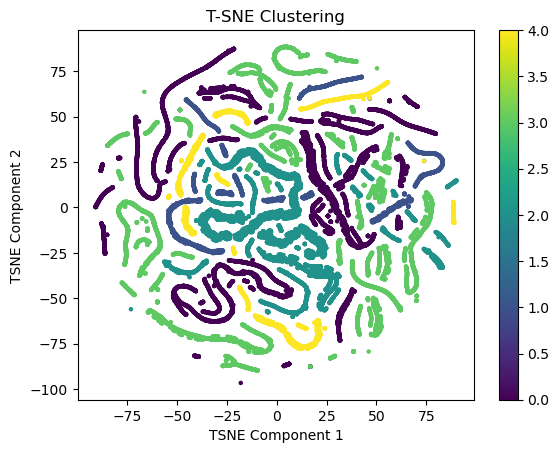

In [41]:
plt.scatter(df_cluster_tsne[:, 0], df_cluster_tsne[:, 1], c = assignments_X_train, s=5, cmap='viridis')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title(f'T-SNE Clustering')
plt.colorbar()
plt.show()

In [42]:
from sklearn.mixture import GaussianMixture
num_data = data.select_dtypes(exclude = 'object').dropna(axis = 1)
DF = pd.DataFrame(data=num_data.copy())

# GMM: n_components = 모델의 총 수
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(num_data)
gmm_cluster_labels = gmm.predict(num_data)

# 클러스터링 결과를 DF 의 'gmm_cluster' 컬럼명으로 저장
DF['gmm_cluster'] = gmm_cluster_labels
DF['target'] = data['target']

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
result = DF.groupby(['target'])['gmm_cluster'].value_counts()
print(result)

target    gmm_cluster
AbNormal  1               1286
          0                845
          2                219
Normal    1              23856
          0               9162
          2               5138
Name: gmm_cluster, dtype: int64


In [43]:
gmm_cluster_labels

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

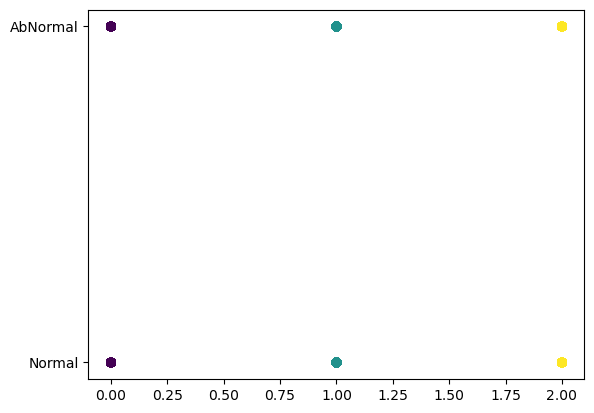

In [44]:
from matplotlib import pyplot as plt

plt.scatter(DF['gmm_cluster'], DF['target'], c=gmm_cluster_labels)